In [22]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Player Performance Analysis

## Business Context / Story
I have been hired as a freelance data analyst by a basketball team’s analytics department.
The coaching staff suspects that traditional scoring statistics (points per game) are not suffieicently or accurately valuing players.

The team want an advanced performance analysis platofrm that evaluates players based on true efficiency, consistency, and situational performance.

The analysis will inform:
- Contract decisions
- Starting lineup optimization
- Player development plans

I am tasked with building a fully documented, stakeholder-friendly analytics project.

In [34]:
import pandas as pd
import sqlite3
import helpers.helper as h


In [35]:
df = pd.read_csv(r"C:\Users\Vim-r\OneDrive\Documents\Python\Projects\DataDile\player-performance-efficiency-analysis\data\processed\database_24_25.csv")
df.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


In [ ]:
conn = sqlite3.connect("nba_stats.db")
df.to_sql("player_stats", conn, if_exists="replace", index=False)

#sql = conn.cursor()
#sql.execute("SELECT name FROM sqlite_master WHERE type='table';")
#sql.fetchall()

#sql.execute("SELECT COUNT(*) FROM player_stats;")
#sql.fetchone()
#sql.execute("SELECT * FROM player_stats LIMIT 5;").fetchall()
#sql.execute("PRAGMA table_info(player_stats);").fetchall()




(16512,)

# 2 Data Cleaning and Preprocessing

Some thigns to note, are the stat abbreviations and what they mean:


Player: Name of the player.
Tm: Abbreviation of the player's team.
Opp: Abbreviation of the opposing team.
Res: Result of the game for the player's team.
MP: Minutes played, represented as a float (e.g., 23.5 = 23 minutes and 30 seconds).
FG: Field goals made.
FGA: Field goal attempts.
FG%: Field goal percentage.
3P: 3-point field goals made.
3PA: 3-point field goal attempts.
3P%: 3-point shooting percentage.
FT: Free throws made.
FTA: Free throw attempts.
FT%: Free throw percentage.
ORB: Offensive rebounds.
DRB: Defensive rebounds.
TRB: Total rebounds.
AST: Assists.
STL: Steals.
BLK: Blocks.
TOV: Turnovers.
PF: Personal fouls.
PTS: Total points scored.
GmSc: Game Score, a metric summarizing player performance for the game.
Data: Date of the game in YYYY-MM-DD format.

In [46]:
df.isna().sum()


Player    0
Tm        0
Opp       0
Res       0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
GmSc      0
Data      0
dtype: int64

In [50]:
df.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


In [53]:
#Create new stats from exisiting data 

df['TS_PCT'] = df['PTS'] / (2 * (df['FGA'] + 0.44*df['FTA']).replace(0,1))
df['REB_EFF'] = df['TRB'] / df['MP']

#push these to SQL
df.to_sql("clean_player_stats", conn, if_exists="replace", index=False)


16512

# 3 Exploratory Data analysis


<Axes: >

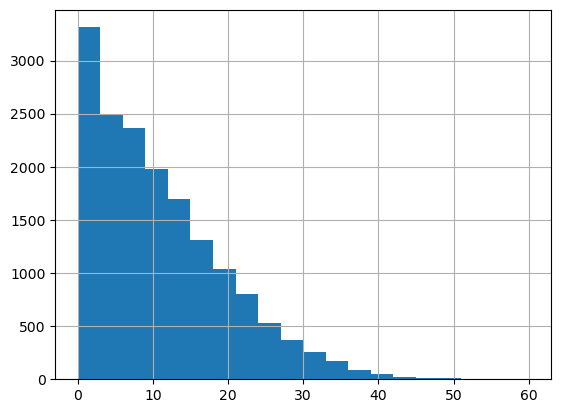

In [56]:
df.describe()

df['PTS'].hist(bins=20)
